# EDA on Client's Recuiting Info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import missingno as msno
import ydata_profiling

import warnings
warnings.filterwarnings("ignore")


<ipython-input-1-da26d83bed2b>:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
from google.colab import files
upload = files.upload()


Saving getDeptCodeInfo as of 4-18-23 (version 1)(2171).xlsx to getDeptCodeInfo as of 4-18-23 (version 1)(2171) (4).xlsx


In [ ]:
df = pd.read_excel('getDeptCodeInfo as of 4-18-23 (version 1)(2171).xlsx', sheet_name = 'Data')
df.head()

,SetIDDepartment,DepartmentID,DepartmentDescription,EffectiveDate,EffectiveStatus,Location,LocationDescription,DirectorEmplID,DirectorName,ChiefChairEmplID,...,RecruiterName,HRBPRoleName,HRBPEmplID,HRBPName,Level2DepartmentID,Level2DepartmentDescription,Level3DepartmentID,Level3DepartmentDescription,Level4DepartmentID,Level4DepartmentDescription
0,IRCMP,421001,Medical Center Human Resources,1910-01-01,A,B63-8,200 Building - 8th Floor,10285743,Michelle Reyes Quint,10285743,...,Joshua Skender Kloppenborg,ULSHR_TM_HRBP_2,10617891,Paul E Guz,MEDO,Medical Center Org,MEDC,Medical Center,428613,Administration
1,IRCMP,421200,People Services HR,1910-01-01,A,B63-8,200 Building - 8th Floor,10285743,Michelle Reyes Quint,10285743,...,Joshua Skender Kloppenborg,ULSHR_TM_HRBP_2,10617891,Paul E Guz,MEDO,Medical Center Org,MEDC,Medical Center,428613,Administration
2,IRCMP,422057,People Services HR,1910-01-01,A,B63-8,200 Building - 8th Floor,10285743,Michelle Reyes Quint,10285743,...,Joshua Skender Kloppenborg,ULSHR_TM_HRBP_2,10617891,Paul E Guz,MEDO,Medical Center Org,MEDC,Medical Center,428613,Administration
3,IRCMP,422102,Medical Center Human Resources,1910-01-01,A,B63-8,200 Building - 8th Floor,10285743,Michelle Reyes Quint,10285743,...,Joshua Skender Kloppenborg,ULSHR_TM_HRBP_2,10617891,Paul E Guz,MEDO,Medical Center Org,MEDC,Medical Center,428613,Administration
4,IRCMP,426010,Surgical ICU,1910-01-01,A,DH-6-62,Douglas Hospital-6th Fl-Wng 62,10307284,Sonia Ramos Lane,10630982,...,Rachel Thornton,ULSHR_TM_HRBP_5,10280253,Constance L Worden,MEDO,Medical Center Org,MEDC,Medical Center,428613,Administration


**Data Preprocessing**

In [ ]:
# shape of the dataset
df.shape

(1208, 23)

In [ ]:
# check for missing values
df.isnull().sum()

SetIDDepartment                0
DepartmentID                   0
DepartmentDescription          0
EffectiveDate                  0
EffectiveStatus                0
Location                       0
LocationDescription            0
DirectorEmplID                 0
DirectorName                   0
ChiefChairEmplID               0
ChiefChairName                 0
RecruiterRoleName              0
RecruiterEmplID                0
RecruiterName                  0
HRBPRoleName                   0
HRBPEmplID                     0
HRBPName                       0
Level2DepartmentID             0
Level2DepartmentDescription    0
Level3DepartmentID             0
Level3DepartmentDescription    0
Level4DepartmentID             0
Level4DepartmentDescription    0
dtype: int64

In [ ]:
# check for data types
df.dtypes

SetIDDepartment                        object
DepartmentID                           object
DepartmentDescription                  object
EffectiveDate                  datetime64[ns]
EffectiveStatus                        object
Location                               object
LocationDescription                    object
DirectorEmplID                         object
DirectorName                           object
ChiefChairEmplID                       object
ChiefChairName                         object
RecruiterRoleName                      object
RecruiterEmplID                        object
RecruiterName                          object
HRBPRoleName                           object
HRBPEmplID                             object
HRBPName                               object
Level2DepartmentID                     object
Level2DepartmentDescription            object
Level3DepartmentID                     object
Level3DepartmentDescription            object
Level4DepartmentID                

In [ ]:
# Convert the variables into categprical variables
categorical_vars = [col for col in df.columns if col != 'EffectiveDate']
df[categorical_vars] = df[categorical_vars].astype('category')


In [ ]:
df.dtypes

SetIDDepartment                      category
DepartmentID                         category
DepartmentDescription                category
EffectiveDate                  datetime64[ns]
EffectiveStatus                      category
Location                             category
LocationDescription                  category
DirectorEmplID                       category
DirectorName                         category
ChiefChairEmplID                     category
ChiefChairName                       category
RecruiterRoleName                    category
RecruiterEmplID                      category
RecruiterName                        category
HRBPRoleName                         category
HRBPEmplID                           category
HRBPName                             category
Level2DepartmentID                   category
Level2DepartmentDescription          category
Level3DepartmentID                   category
Level3DepartmentDescription          category
Level4DepartmentID                

## EDA

In [ ]:
num_categories = df['DepartmentDescription'].nunique()

print("Number of categories in 'DepartmentDescription' column:", num_categories)


Number of categories in 'DepartmentDescription' column: 1166


In [ ]:
num_categories = df['DepartmentID'].nunique()

print("Number of categories in 'DepartmentID' column:", num_categories)


Number of categories in 'DepartmentID' column: 1206


In [ ]:
num_categories = df['Location'].nunique()

print("Number of categories in 'Location' column:", num_categories)


Number of categories in 'Location' column: 166


## Level Two Department

In [ ]:
table = df['Level2DepartmentID'].value_counts().reset_index()
table.columns = ['Level2DepartmentID', 'Count']
table['Percentage'] = (table['Count'] / table['Count'].sum()) * 100
table['Percentage'] = table['Percentage'].round(2)

print(table);


  Level2DepartmentID  Count  Percentage
0               IRVN    674       55.79
1               MEDO    324       26.82
2               COHS    209       17.30
3                         1        0.08


The information provided in the table gives us insights into the distribution and relative frequencies of different Level2 Department IDs in the recruitment activity. It highlights the following:

- The 'IRVN' Department: The Level2 Department ID 'IRVN' appears 674 times in the dataset, accounting for approximately 55.79% of the observations. This suggests that the 'IRVN' department is the most common or has the highest representation among the Level2 departments in the recruitment process.

- The 'MEDO' Department: The Level2 Department ID 'MEDO' is observed 324 times, representing around 26.82% of the dataset. This indicates that the 'MEDO' department is the second most frequent department in terms of occurrence during recruitment activities.

- The 'COHS' Department: The Level2 Department ID 'COHS' is present 209 times, making up approximately 17.30% of the dataset. This implies that the 'COHS' department is less frequent compared to 'IRVN' and 'MEDO', but still has a notable representation in the recruitment process.

- Empty Category: The last row in the table, with a blank space under 'Level2DepartmentID', indicates an unknown or missing Level2 Department ID. It appears only once in the dataset, representing a very small percentage (approximately 0.08%) of the total observations during recruitment.

The above information can further be represented using a dougnut chart

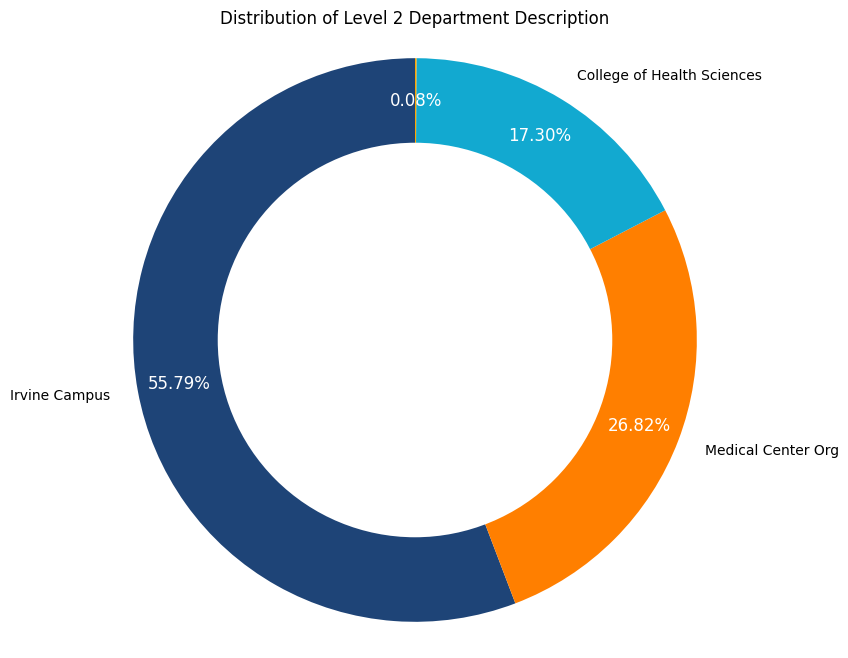

In [ ]:
# Calculate the counts
level2_counts = df['Level2DepartmentDescription'].value_counts()
labels = level2_counts.index
sizes = level2_counts.values

# Calculate percentages
total = sizes.sum()
percentages = [(count / total) * 100 for count in sizes]

# Define the color palette
colors = ['#1E4477', '#FF7F00', '#12A9D0', '#FFA500', '#FFC04C', '#A8CC8C', '#1271B2']

# Create a doughnut chart with percentages
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(sizes, labels = labels, colors = colors, autopct='%.2f%%', startangle = 90, pctdistance = 0.85)

# Set the properties of the percentage labels
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Draw a white circle in the center to create a doughnut shape
center_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig.gca().add_artist(center_circle)

# Set aspect ratio to equal to ensure a circular shape
ax.axis('equal')

plt.title('Distribution of Level 2 Department Description')
plt.show()


## Level Three Department

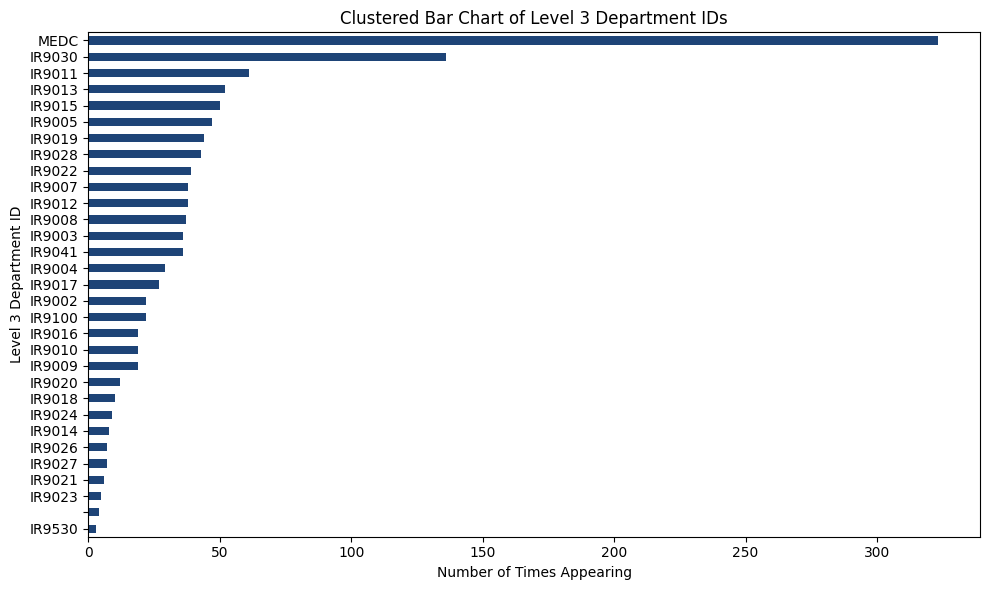

In [ ]:
# Calculate the counts for each category
category_counts = df['Level3DepartmentID'].value_counts()

# Sort the categories based on their counts in ascending order
sorted_categories = category_counts.sort_values(ascending = True)

# Create a horizontal bar
plt.figure(figsize = (10, 6))
colors = ['#1E4477']
sorted_categories.plot(kind='barh', color=colors)

plt.xlabel('Number of Times Appearing')
plt.ylabel('Level 3 Department ID')
plt.title('Clustered Bar Chart of Level 3 Department IDs')
plt.tight_layout()
plt.show();


In [ ]:
# Calculate the counts and percentages
category_counts = df['Level3DepartmentID'].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100

# Create a DataFrame with count and percentage columns
table = pd.DataFrame({'Count': category_counts, 'Percentage': percentages})

# Sort the table by count in descending order
table = table.sort_values('Count', ascending = False)

# Format the percentage column to 2 decimal places
table['Percentage'] = table['Percentage'].map('{:.2f}%'.format)

# Display the table
print(table);


        Count Percentage
MEDC      323     26.74%
IR9030    136     11.26%
IR9011     61      5.05%
IR9013     52      4.30%
IR9015     50      4.14%
IR9005     47      3.89%
IR9019     44      3.64%
IR9028     43      3.56%
IR9022     39      3.23%
IR9007     38      3.15%
IR9012     38      3.15%
IR9008     37      3.06%
IR9003     36      2.98%
IR9041     36      2.98%
IR9004     29      2.40%
IR9017     27      2.24%
IR9002     22      1.82%
IR9100     22      1.82%
IR9016     19      1.57%
IR9010     19      1.57%
IR9009     19      1.57%
IR9020     12      0.99%
IR9018     10      0.83%
IR9024      9      0.75%
IR9014      8      0.66%
IR9026      7      0.58%
IR9027      7      0.58%
IR9021      6      0.50%
IR9023      5      0.41%
            4      0.33%
IR9530      3      0.25%


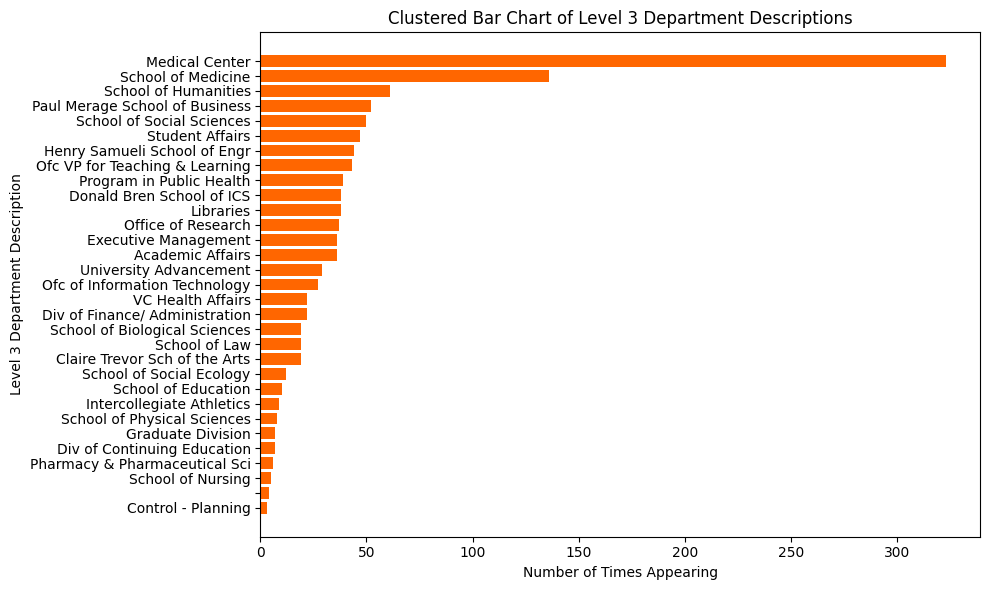

In [ ]:
# Calculate the counts for each category
category_counts = df['Level3DepartmentDescription'].value_counts()

# Sort the categories based on their counts in ascending order
sorted_categories = category_counts.sort_values(ascending = True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories.index, sorted_categories.values, color = '#FF6600')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Level 3 Department Description')
plt.title('Clustered Bar Chart of Level 3 Department Descriptions')
plt.tight_layout()
plt.show();


The figure above provides insights into the relationship between department descriptions in department 3 and recruitment activity. Among the different department descriptions, it is evident that "Medical Center" has the highest frequency, indicating a greater recruitment activity within that specific department. Following "Medical Center," the department descriptions "School of Medicine" and "School of Humanities" exhibit notable presence but at a relatively lower level compared to "Medical Center."

This finding suggests that within department 3, the recruitment activity is primarily concentrated in the "Medical Center" department. However, it is worth noting that there is also recruitment activity observed in the departments associated with "School of Medicine" and "School of Humanities," albeit at a lesser extent.

These insights provide valuable information about the distribution of recruitment activity across different department descriptions within department 3. It may be indicative of specific hiring needs or strategic focus areas within the organization.

## Level Four Department

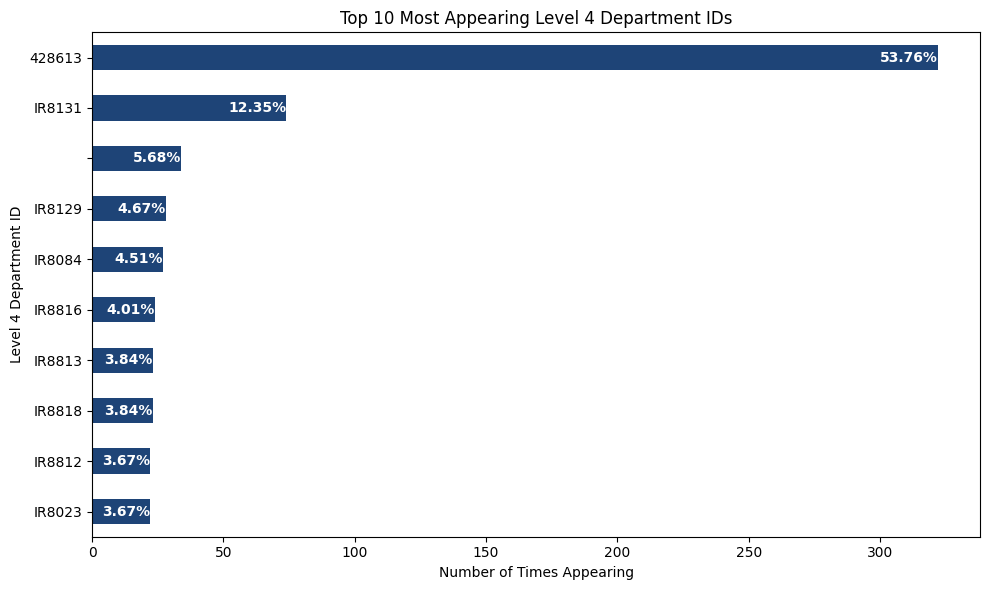

In [ ]:
# Calculate the counts for each category
category_counts = df['Level4DepartmentID'].value_counts()

# Select the top 10 most appearing categories
top_10_categories = category_counts.nlargest(10)

# Sort the categories based on their counts in descending order
sorted_categories = top_10_categories.sort_values(ascending = True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['#1E4477']
sorted_categories.plot(kind='barh', color = colors)

plt.xlabel('Number of Times Appearing')
plt.ylabel('Level 4 Department ID')
plt.title('Top 10 Most Appearing Level 4 Department IDs')

# Add the percentages inside the bars
total = sorted_categories.sum()
for i, count in enumerate(sorted_categories.values):
    percentage = (count / total) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha='right', va='center', color = 'white', fontweight = 'bold')

plt.tight_layout()
plt.show();


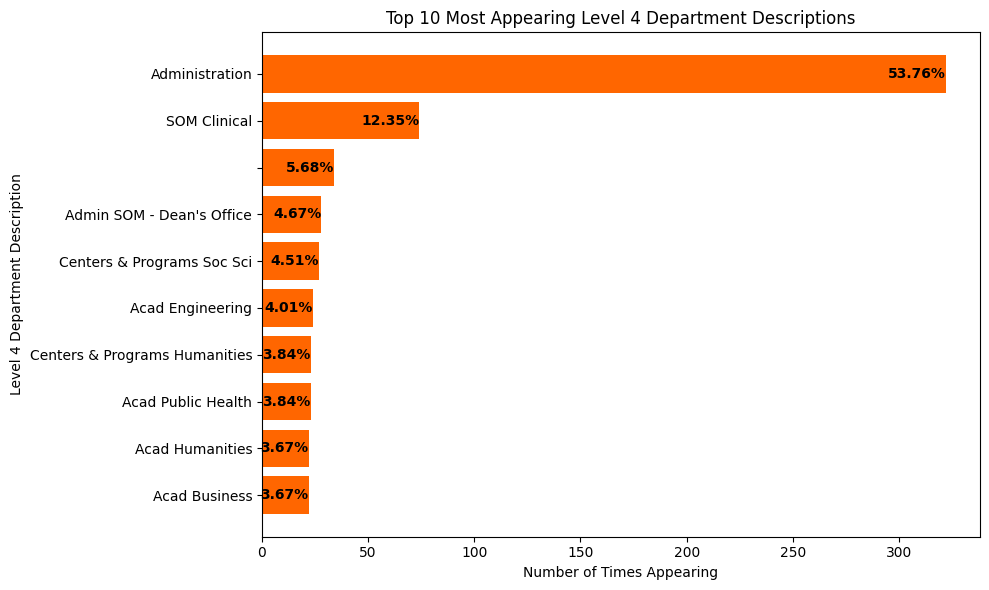

In [ ]:
# Calculate the counts for each category
category_counts = df['Level4DepartmentDescription'].value_counts()

# Select the top 10 most appearing categories
top_10_categories = category_counts.nlargest(10)

# Sort the categories based on their counts in descending order
sorted_categories = top_10_categories.sort_values(ascending = True)

# Calculate the percentages
total_count = sorted_categories.sum()
percentages = [(count / total_count) * 100 for count in sorted_categories.values]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories.index, sorted_categories.values, color = '#FF6600')

# Add the percentages inside the bars
for i, count in enumerate(sorted_categories.values):
    plt.text(count, i, f'{percentages[i]:.2f}%', ha='right', va='center', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Level 4 Department Description')
plt.title('Top 10 Most Appearing Level 4 Department Descriptions')

plt.tight_layout()
plt.show();


Based on the percentages obtained from the bar plot for Level 4 Department Descriptions, the top three departments in terms of recruitment activity are:

- Administration: This department has the highest percentage at 53.76%, indicating that a significant portion of the recruitment activity is associated with administrative tasks or roles within the organization. This suggests that administrative functions play a prominent role in the recruitment process.

- SOM Clinical: The department labeled "SOM Clinical" has a percentage of 12.35%. Although lower than the Administration department, it still represents a substantial portion of the recruitment activity. This indicates that clinical activities or roles within the School of Medicine (SOM) are prevalent and contribute significantly to the recruitment efforts.

- Unnamed/Blank Level 4 Department: There is a category representing a blank or unnamed level four department, accounting for 5.68% of the occurrences. This suggests that there are some entries in the dataset where the level four department is not specified or is missing. Further investigation is required to understand the reasons behind these missing or uncategorized entries and their implications for recruitment.

These percentages provide valuable insights into the distribution of recruitment activity among the top three departments. The high percentage for Administration highlights its dominant role, while the percentages for SOM Clinical and the unnamed department indicate their relative importance in the recruitment process, although to a lesser extent. This information can guide decision-making and resource allocation towards areas with higher recruitment activity and help identify potential areas for improvement or optimization in the recruitment process.

## Recruiters

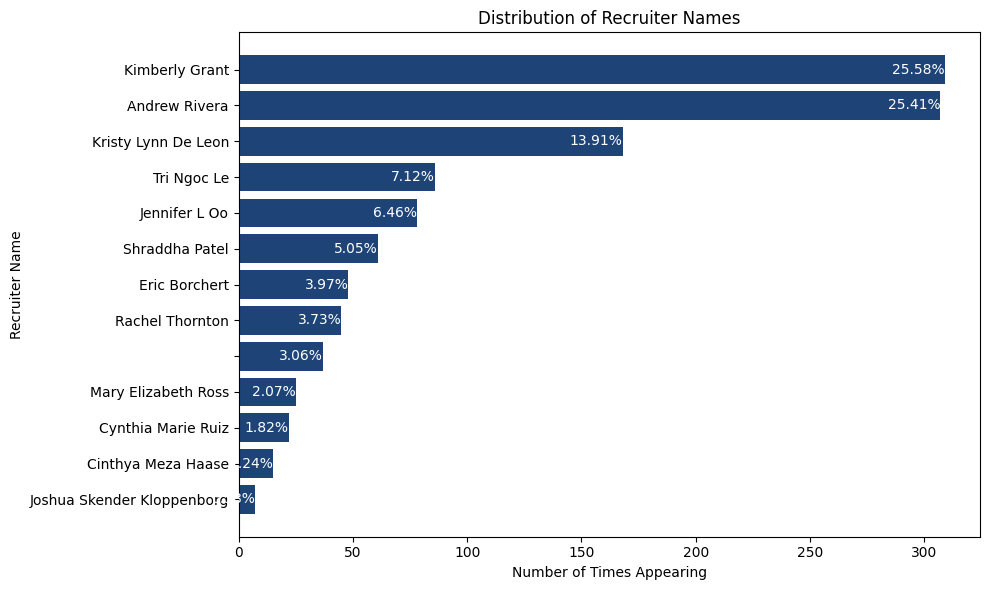

In [ ]:
# Calculate the counts for each recruiter name
recruiter_counts = df['RecruiterName'].value_counts()

# Sort the recruiters based on their counts in descending order
sorted_recruiters = recruiter_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_recruiters.index, sorted_recruiters.values, color='#1E4477')

# Add the percentages inside the bars
for i, count in enumerate(sorted_recruiters.values):
    percentage = (count / recruiter_counts.sum()) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha = 'right', va='center', color='white')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Recruiter Name')
plt.title('Distribution of Recruiter Names')

plt.tight_layout()
plt.show();


Based on the bar plot of recruiter names and their corresponding percentages, the following interpretations can be made regarding their recruitment activity:

- Kimberly Grant: With a percentage of 25.58%, Kimberly Grant emerges as the top recruiter in the dataset. Her appearance is the most frequent among all recruiters, indicating her significant contribution to the recruitment activity. She plays a pivotal role in the hiring process.

- Andrew Rivera: Andrew Rivera follows closely as the second top recruiter, with a percentage of 25.41%. His presence in the dataset is nearly on par with Kimberly Grant, suggesting that he is also actively involved in recruitment efforts. He shares a similar level of influence and impact in the hiring process.

- Kristy Lynn De Leon: Kristy Lynn De Leon holds the third position among recruiters, with a percentage of 13.41%. Although slightly lower than the top two recruiters, she still demonstrates a considerable presence in the dataset. Her involvement showcases her contribution to the recruitment activity and implies a significant role in the hiring process.

These percentages shed light on the distribution of recruiters and their respective levels of involvement in the dataset. The top three recruiters, namely Kimberly Grant, Andrew Rivera, and Kristy Lynn De Leon, play crucial roles in driving the recruitment activity, indicating their importance in sourcing and selecting candidates for the organization.

In [ ]:
# Calculate the counts for each recruiter name
recruiter_counts = df['RecruiterName'].value_counts()

# Select the top 10 most appearing recruiter names
top_10_recruiters = recruiter_counts.nlargest(10)

# Calculate the total count
total_count = top_10_recruiters.sum()

# Calculate the percentages rounded to 2 decimal places
percentages = (top_10_recruiters / total_count) * 100
percentages = percentages.round(2)

# Create a DataFrame with the counts and percentages
table_data = pd.DataFrame({'Count': top_10_recruiters, 'Percentage': percentages})

# Print the table
print(table_data)


                     Count  Percentage
Kimberly Grant         309       26.55
Andrew Rivera          307       26.37
Kristy Lynn De Leon    168       14.43
Tri Ngoc Le             86        7.39
Jennifer L Oo           78        6.70
Shraddha Patel          61        5.24
Eric Borchert           48        4.12
Rachel Thornton         45        3.87
                        37        3.18
Mary Elizabeth Ross     25        2.15


## Location

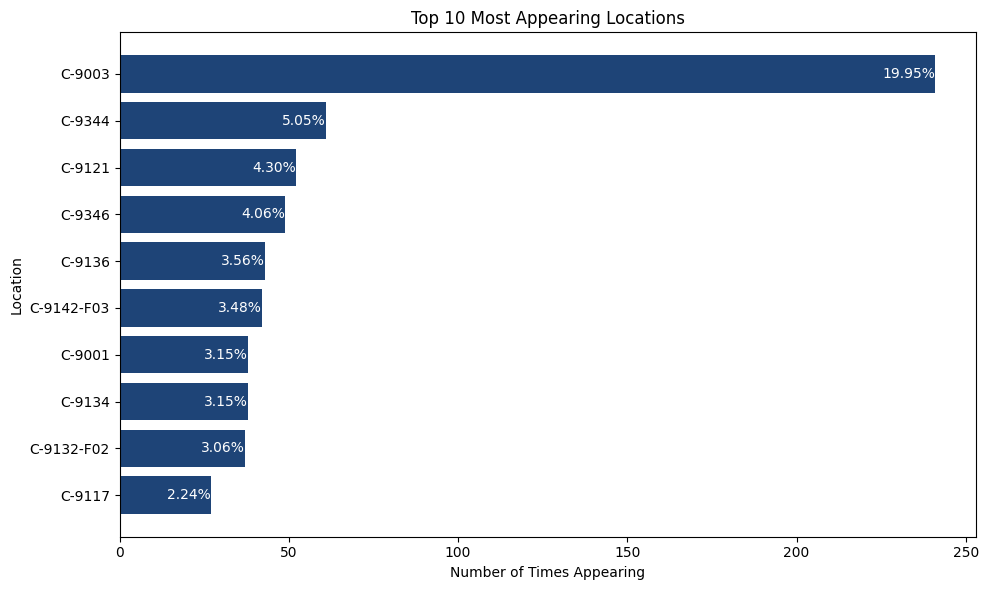

In [ ]:
# Calculate the counts for each location
location_counts = df['Location'].value_counts()

# Select the top 10 most appearing locations
top_10_locations = location_counts.nlargest(10)

# Sort the locations based on their counts in ascending order
sorted_locations = top_10_locations.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_locations.index, sorted_locations.values, color='#1E4477')

# Add percentage labels to the bars
for bar in bars:
    count = bar.get_width()
    percentage = (count / location_counts.sum()) * 100
    plt.text(count, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='right', va='center', color='white')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Location')
plt.title('Top 10 Most Appearing Locations')

plt.tight_layout()
plt.show();


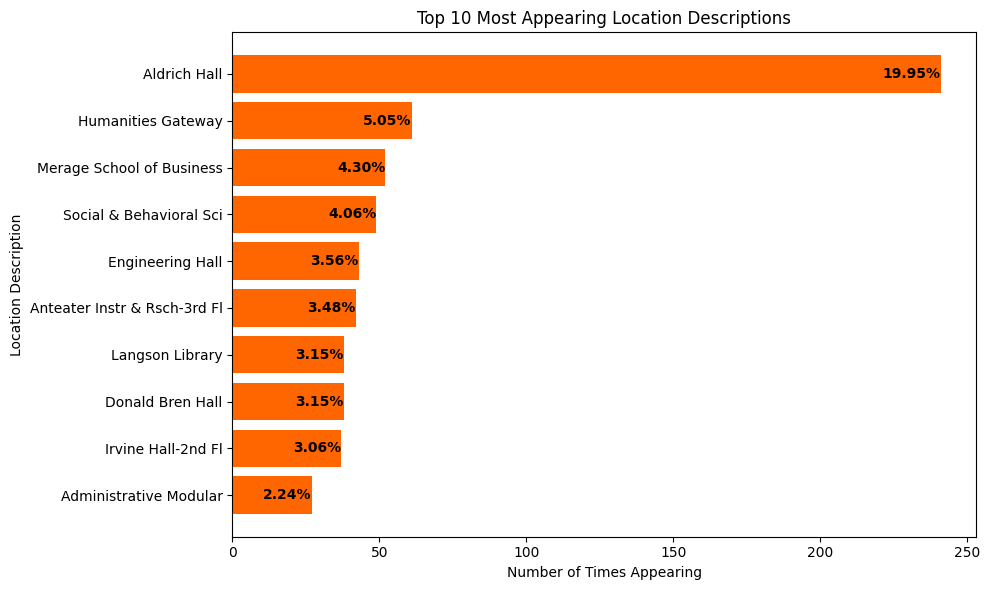

In [ ]:
# Calculate the counts for each location description
location_counts = df['LocationDescription'].value_counts()

# Select the top 10 most appearing location descriptions
top_10_locations = location_counts.nlargest(10)

# Sort the location descriptions based on their counts in ascending order
sorted_locations = top_10_locations.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize = (10, 6))
bars = plt.barh(sorted_locations.index, sorted_locations.values, color = '#FF6600')

# Add percentage labels to the bars
for bar in bars:
    count = bar.get_width()
    percentage = (count / location_counts.sum()) * 100
    plt.text(count, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='right', va = 'center', color = 'black', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Location Description')
plt.title('Top 10 Most Appearing Location Descriptions')

plt.tight_layout()
plt.show();


Based on the bar plot depicting location descriptions for recruitment, the following interpretations can be made regarding the recruitment activity:

- Adrich Hall: With an occurrence rate of approximately 19.95%, Adrich Hall stands out as the most frequently mentioned location in the dataset. This suggests that recruitment activities predominantly take place at Adrich Hall, indicating its significance as a primary venue for recruitment events or processes.

- Humanities Gateway: The location description "Humanities Gateway" emerges as the second most common, with a percentage of approximately 5.05%. This implies that recruitment activities are also frequently conducted at this location, highlighting its relevance in the recruitment process.

- Merage School of Business: Merage School of Business holds the third position among location descriptions, accounting for around 4.30% of occurrences. This indicates that recruitment activities are notably associated with the Merage School of Business, emphasizing its role as a significant recruitment site within the organization.

These top three locations reveal the concentration of recruitment activities based on their frequency of appearance in the dataset. Adrich Hall, Humanities Gateway, and Merage School of Business represent prominent venues where recruitment processes are frequently conducted, suggesting their importance in the organization's recruitment strategies.

## Chief Chair Names

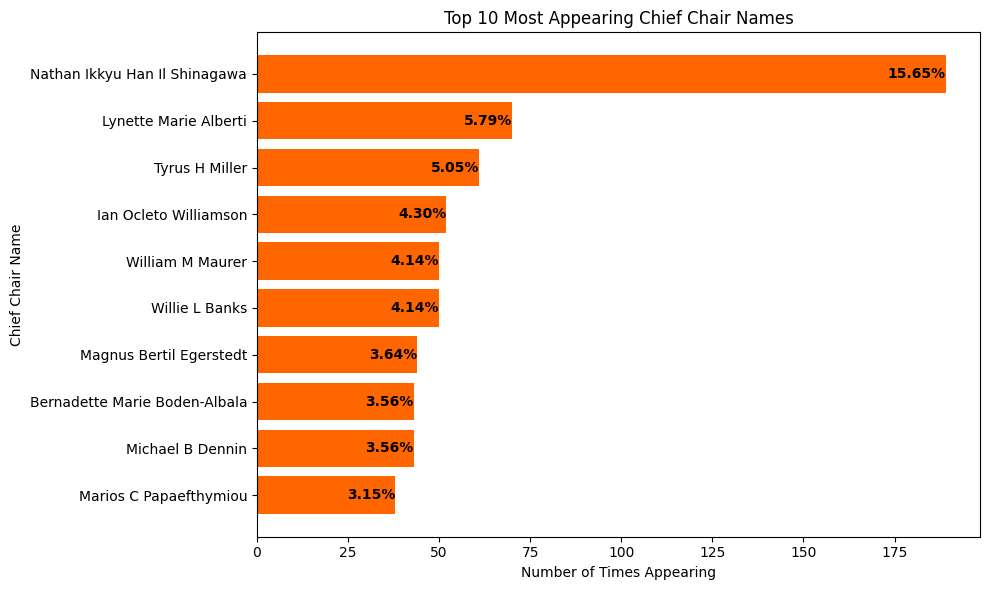

In [ ]:
# Calculate the counts for each ChiefChairName
chief_chair_counts = df['ChiefChairName'].value_counts()

# Select the top 10 most appearing ChiefChairNames
top_10_chief_chairs = chief_chair_counts.nlargest(10)

# Sort the ChiefChairNames based on their counts in ascending order
sorted_chief_chairs = top_10_chief_chairs.sort_values(ascending = True)

# Create a horizontal bar chart with orange color
plt.figure(figsize=(10, 6))
plt.barh(sorted_chief_chairs.index, sorted_chief_chairs.values, color = '#FF6600')

# Add percentage labels to the bars
for i, count in enumerate(sorted_chief_chairs.values):
    percentage = (count / chief_chair_counts.sum()) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha = 'right', va = 'center', color = 'black', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Chief Chair Name')
plt.title('Top 10 Most Appearing Chief Chair Names')

plt.tight_layout()
plt.show();


Based on the plot of Chief Chair Names, the following interpretations can be made in relation to the recruitment process:

- Nathan Ikkyu Han Il Shinagawa: This Chief Chair Name appears the most frequently, accounting for approximately 15.65% of all the Chief Chair Names in the dataset. This suggests that Nathan Ikkyu Han Il Shinagawa holds a prominent role in the recruitment process, potentially being responsible for key decision-making or leadership in recruitment-related activities.

- Lynette Mari Alberti: The second most common Chief Chair Name is Lynette Mari Alberti, with a percentage of approximately 5.79%. This indicates that Lynette Mari Alberti also plays a significant role in the recruitment process, likely contributing to strategic decisions or overseeing specific aspects of recruitment.

- Tyrus H Miller: The third most appearing Chief Chair Name is Tyrus H Miller, accounting for around 5.05% of the total. This suggests that Tyrus H Miller has a notable involvement in the recruitment process, potentially contributing expertise or leadership in recruitment-related matters.

These top three Chief Chair Names represent individuals who appear most frequently in the dataset, indicating their significance and potential influence in the recruitment process. Their presence suggests their involvement in shaping recruitment strategies, making decisions, or overseeing recruitment activities within the organization.

## Recruiter Role Name

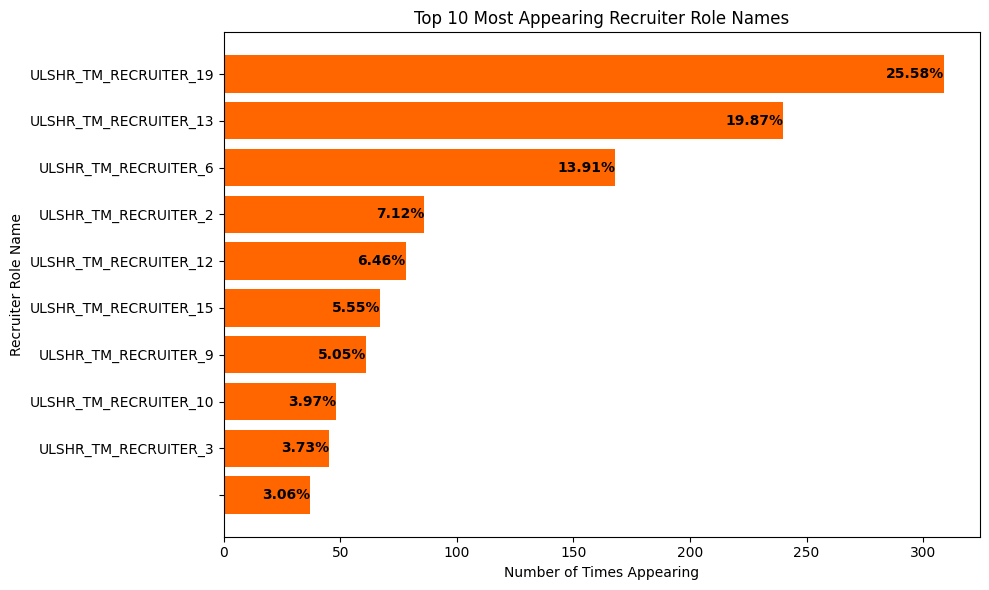

In [ ]:
# Calculate the counts for each RecruiterRoleName
recruiter_role_counts = df['RecruiterRoleName'].value_counts()

# Select the top 10 most appearing RecruiterRoleNames
top_10_recruiter_roles = recruiter_role_counts.nlargest(10)

# Sort the RecruiterRoleNames based on their counts in ascending order
sorted_recruiter_roles = top_10_recruiter_roles.sort_values(ascending = True)

# Create a horizontal bar chart with orange color
plt.figure(figsize=(10, 6))
plt.barh(sorted_recruiter_roles.index, sorted_recruiter_roles.values, color = '#FF6600')

# Add percentage labels to the bars
for i, count in enumerate(sorted_recruiter_roles.values):
    percentage = (count / recruiter_role_counts.sum()) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha = 'right', va = 'center', color = 'black', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Recruiter Role Name')
plt.title('Top 10 Most Appearing Recruiter Role Names')

plt.tight_layout()
plt.show();


Based on the plot displaying recruiter role names, the following observations can be made regarding their frequency in the recruitment activities:

- ULSHR_TMRECRUITER_19: With an occurrence rate of approximately 25.58%, ULSHR_TMRECRUITER_19 emerges as the most frequently appearing recruiter role name in the dataset. This suggests that ULSHR_TMRECRUITER_19 plays a prominent and central role in the recruitment process.

- ULSHR_TMRECRUITER_13: The second most common recruiter role name is ULSHR_TMRECRUITER_13, accounting for approximately 19.87% of the total. This indicates that ULSHR_TMRECRUITER_13 holds a significant position and is actively involved in recruitment activities.

- ULSHR_TMRECRUITER_6: ULSHR_TMRECRUITER_6 ranks third in terms of frequency, representing approximately 13.91% of occurrences. This suggests that ULSHR_TMRECRUITER_6 plays a substantial role in the recruitment process as well.

These top three recruiter role names reflect the roles that appear most frequently in the dataset, highlighting their importance and involvement in the recruitment operations. The prominence of ULSHR_TMRECRUITER_19, ULSHR_TMRECRUITER_13, and ULSHR_TMRECRUITER_6 indicates their significant contributions to the recruitment activities within the organization.

## HRBP Role Name

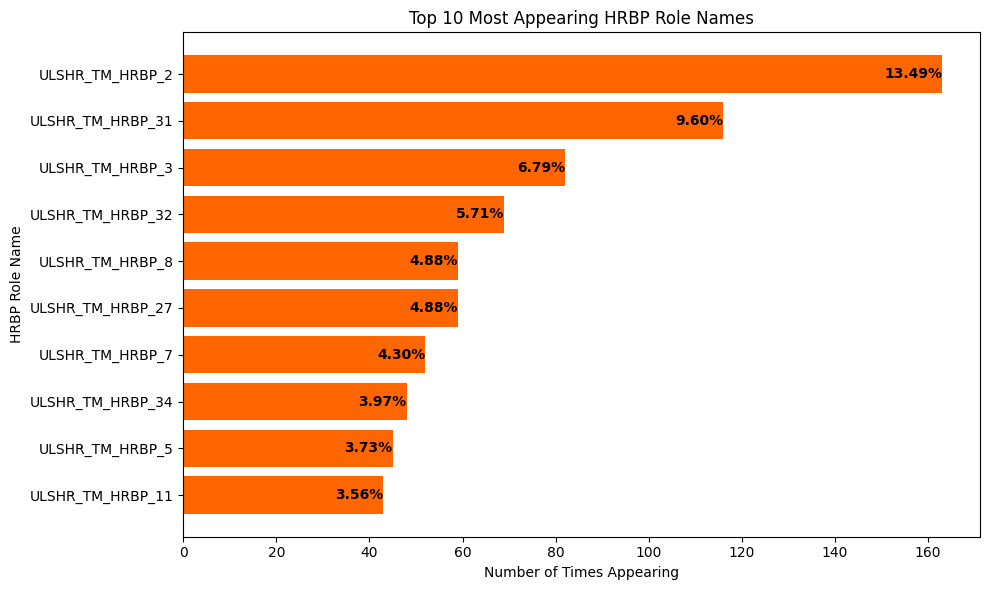

In [ ]:
# Calculate the counts for each HRBPRoleName
hrbp_role_counts = df['HRBPRoleName'].value_counts()

# Select the top 10 most appearing HRBPRoleNames
top_10_hrbp_roles = hrbp_role_counts.nlargest(10)

# Sort the HRBPRoleNames based on their counts in ascending order
sorted_hrbp_roles = top_10_hrbp_roles.sort_values(ascending = True)

# Create a horizontal bar chart with orange color
plt.figure(figsize=(10, 6))
plt.barh(sorted_hrbp_roles.index, sorted_hrbp_roles.values, color = '#FF6600')

# Add percentage labels to the bars
for i, count in enumerate(sorted_hrbp_roles.values):
    percentage = (count / hrbp_role_counts.sum()) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha = 'right', va = 'center', color = 'black', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('HRBP Role Name')
plt.title('Top 10 Most Appearing HRBP Role Names')

plt.tight_layout()
plt.show();


Based on the bar plot displaying HRBP (Human Resources Business Partner) role names, the following observations can be made regarding their frequency in the recruitment process:

- ULSHR_TM_HRBP_2: With an occurrence rate of approximately 13.49%, ULSHR_TM_HRBP_2 emerges as the most frequently appearing HRBP role name in the dataset. This suggests that ULSHR_TM_HRBP_2 holds a dominant position and plays a central role as an HRBP within the recruitment process.

- ULSHR_TM_HRBP_31: The second most common HRBP role name is ULSHR_TM_HRBP_31, accounting for approximately 9.60% of the total. This indicates that ULSHR_TM_HRBP_31 also holds a significant position and actively contributes as an HRBP in the recruitment activities.

- ULSHR_TM_HRBP_3: ULSHR_TM_HRBP_3 ranks third in terms of frequency, representing around 6.79% of occurrences. This suggests that ULSHR_TM_HRBP_3 plays a notable role as an HRBP in the recruitment process as well.

These top three HRBP role names reflect the roles that appear most frequently in the dataset, highlighting their importance and involvement as HRBPs in the recruitment operations. The prominence of ULSHR_TM_HRBP_2, ULSHR_TM_HRBP_31, and ULSHR_TM_HRBP_3 indicates their significant contributions and responsibilities within the HRBP function of the recruitment activities.

## Director Name

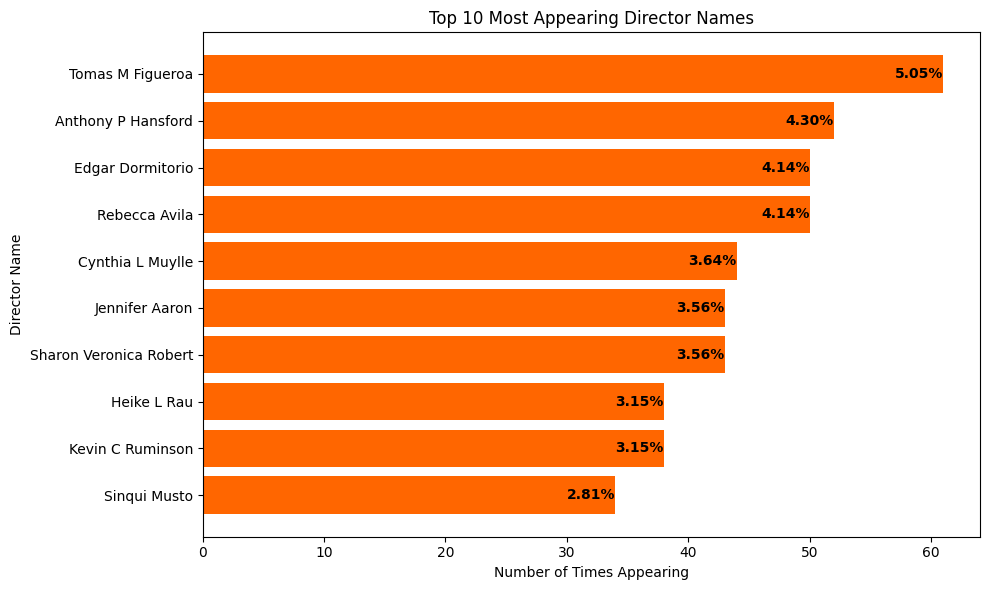

In [ ]:
# Calculate the counts for each DirectorName
director_counts = df['DirectorName'].value_counts()

# Select the top 10 most appearing DirectorNames
top_10_directors = director_counts.nlargest(10)

# Sort the DirectorNames based on their counts in ascending order
sorted_directors = top_10_directors.sort_values(ascending = True)

# Create a horizontal bar chart with orange color
plt.figure(figsize=(10, 6))
plt.barh(sorted_directors.index, sorted_directors.values, color = '#FF6600')

# Add percentage labels to the bars
for i, count in enumerate(sorted_directors.values):
    percentage = (count / director_counts.sum()) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha = 'right', va='center', color='black', fontweight = 'bold')

plt.xlabel('Number of Times Appearing')
plt.ylabel('Director Name')
plt.title('Top 10 Most Appearing Director Names')

plt.tight_layout()
plt.show()


Based on the bar plot showcasing director names in the recruitment process, the following observations can be made regarding their frequency:

- Tomas M Figueroa: With an occurrence rate of approximately 5.05%, Tomas M Figueroa emerges as the most frequently appearing director in the dataset. This suggests that Tomas M Figueroa plays a significant role in overseeing the recruitment process, indicating their involvement and authority in recruitment-related activities.

- Anthony P Hansford: The second most common director name is Anthony P Hansford, accounting for approximately 4.30% of the total. This indicates that Anthony P Hansford is actively engaged in the recruitment process and holds a notable position as a director, contributing to the management and decision-making aspects of recruitment.

- Edgar Dormitorio: Edgar Dormitorio ranks third in terms of frequency, representing around 4.14% of occurrences. This indicates that Edgar Dormitorio is also actively involved as a director in the recruitment process, contributing to the strategic oversight and direction of recruitment activities.

These top three director names reflect individuals who appear most frequently in the dataset, highlighting their significance and involvement in the recruitment process. The prominence of Tomas M Figueroa, Anthony P Hansford, and Edgar Dormitorio suggests their influential roles in overseeing and managing recruitment-related activities as directors.

## Date

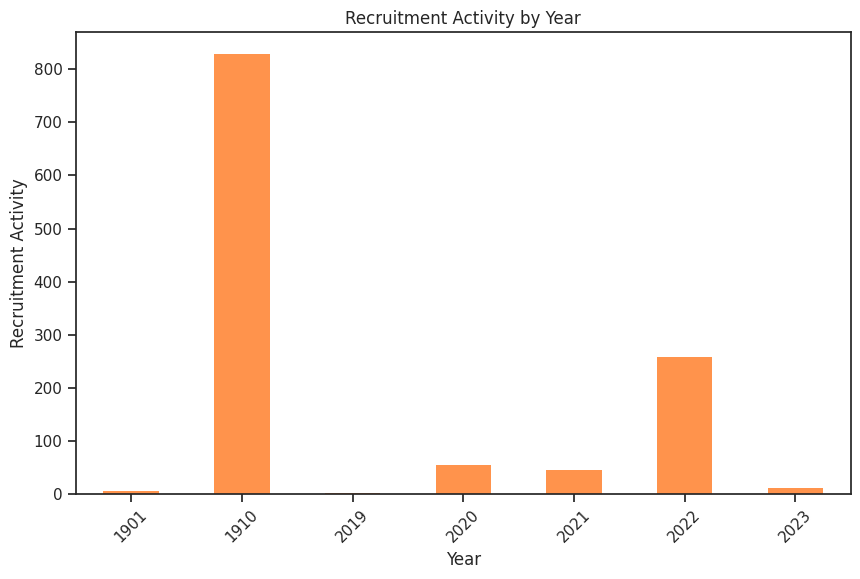

In [ ]:
# Convert EffectiveDate to datetime format
df['EffectiveDate'] = pd.to_datetime(df['EffectiveDate'])

# Extract year information
df['Year'] = df['EffectiveDate'].dt.year

# Count recruitment activity by year
recruitment_by_year = df['Year'].value_counts().sort_index()

# Create a bar chart for recruitment activity
sns.set(style='ticks')  # Set seaborn theme to remove background and gridlines
recruitment_by_year.plot(kind='bar', color='#FF6600', alpha=0.7, edgecolor='none', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Recruitment Activity')
plt.title('Recruitment Activity by Year')
plt.xticks(rotation=45)

plt.show();


Based on the bar plot above, it can be observed that the recruitment activity experienced a notable increase from 1901 to 1910, followed by a downward trend since then. However, there was a significant increase in recruitment activity in the previous year, 2022, before experiencing a decline again in the current year, 2023.

The rise in recruitment activity from 1901 to 1910 suggests a period of substantial recruitment efforts during that time. It may indicate specific events, organizational growth, or increased hiring needs during that period.

However, since 1910, the overall trend has been a decrease in recruitment activity, with occasional fluctuations. The increase in recruitment activity in 2022 may indicate a temporary surge or a specific event that drove higher recruitment efforts. The subsequent decline in 2023 suggests a return to the overall downward trend.

These observations highlight the historical recruitment patterns, including the rise from 1901 to 1910 followed by a general decrease in recruitment activity over the years, with occasional fluctuations. Further analysis and exploration may be required to understand the factors contributing to these observed patterns and fluctuations in recruitment activity over time.